<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/incremental_capstone_7_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch

import scipy.cluster.hierarchy as shc

In [ ]:
df = pd.read_csv('CC GENERAL.csv').drop('CUST_ID', axis = 1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
df.shape

(8950, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

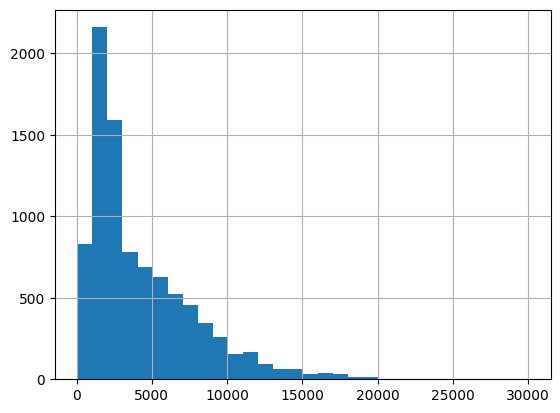

In [ ]:
df['CREDIT_LIMIT'].hist(bins = 30)

In [ ]:
print(f"mean: {df['CREDIT_LIMIT'].mean()}")
print(f"median: {df['CREDIT_LIMIT'].median()}")

mean: 4494.449450364621
median: 3000.0


In [ ]:
df['CREDIT_LIMIT'] .fillna(value = df['CREDIT_LIMIT'].median(), inplace = True)

<Axes: >

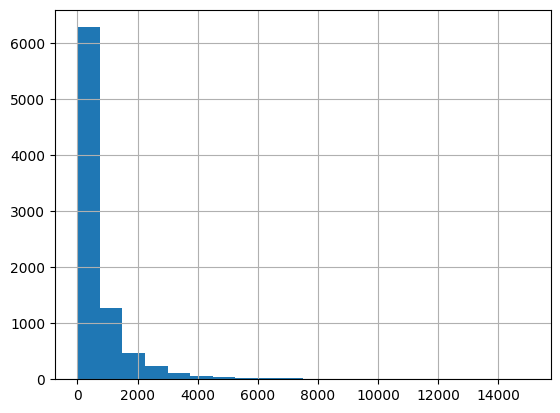

In [ ]:
df['MINIMUM_PAYMENTS'].hist(bins = 20, range = [0, 15_000])

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(value = df['MINIMUM_PAYMENTS'].median(), inplace = True)

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
st = StandardScaler()

df_scaled = st.fit_transform(df)

In [ ]:
total_components = df_scaled.shape[1]

pca = PCA(n_components= total_components)

X_pca = pca.fit_transform(df_scaled)

pc_values = np.arange(1,pca.n_components_ + 1)

pc_values


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

Text(0, 0.5, 'Variance Explained')

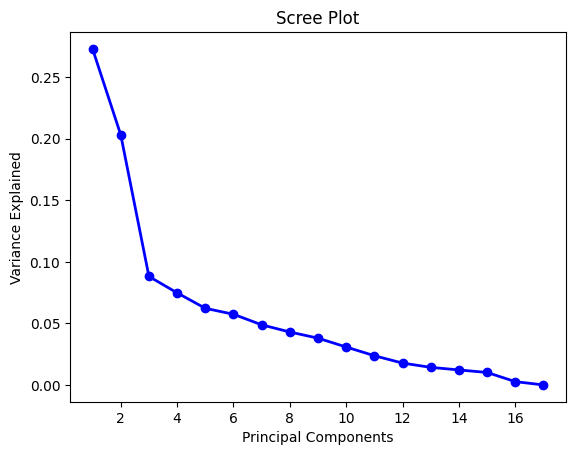

In [ ]:
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth = 2, color = 'blue' )
plt.title("Scree Plot")
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

In [ ]:
cummulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
cummulative_variance_ratio

array([0.27297671, 0.47611451, 0.56424633, 0.63904157, 0.70128886,
       0.75868943, 0.80752368, 0.85051572, 0.8884983 , 0.91929833,
       0.94302084, 0.96075453, 0.9750331 , 0.9872023 , 0.99732897,
       0.99999931, 1.        ])

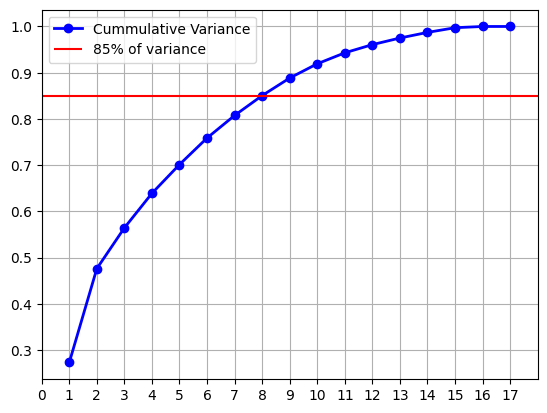

In [ ]:
plt.plot(pc_values, cummulative_variance_ratio, 'o-',
         linewidth=2,color='blue', label = 'Cummulative Variance')

plt.hlines(y = .85, color = 'red', xmin = -0, xmax = 18, label = '85% of variance')

plt.xlim(0,18)
plt.xticks(ticks = np.arange(0,18,1))
plt.legend()
plt.grid()

In [ ]:
df_scaled_df= pd.DataFrame(df_scaled)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(df_scaled_df.cov().T)


In [ ]:
eigenvalues

array([4.64112269e+00, 3.45372843e+00, 1.49840831e+00, 1.27166123e+00,
       1.05832222e+00, 9.75918638e-01, 8.30275112e-01, 7.30946222e-01,
       6.45776132e-01, 5.23658895e-01, 4.03327742e-01, 3.01506526e-01,
       2.42762789e-01, 1.72172632e-01, 2.06899443e-01, 4.54009954e-02,
       1.16501572e-05])

In [ ]:
pca2 = PCA(n_components=2)

X_pca2 = pca2.fit_transform(df_scaled)

In [ ]:
comp = pd.DataFrame(pca2.components_, columns = df.columns)

In [ ]:
comp

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.101735,0.120490,0.411562,0.346334,0.336761,-0.022810,0.321232,0.294493,0.274494,-0.088582,-0.048135,0.390599,0.211916,0.266482,0.063269,0.131833,0.081086
1,0.403815,0.131345,0.040025,0.061917,-0.019173,0.439026,-0.191148,-0.018560,-0.178869,0.434121,0.419645,-0.020171,0.238031,0.256717,0.169067,-0.190067,-0.004256


Text(0, 0.5, 'Within Cluster Sum of Squares')

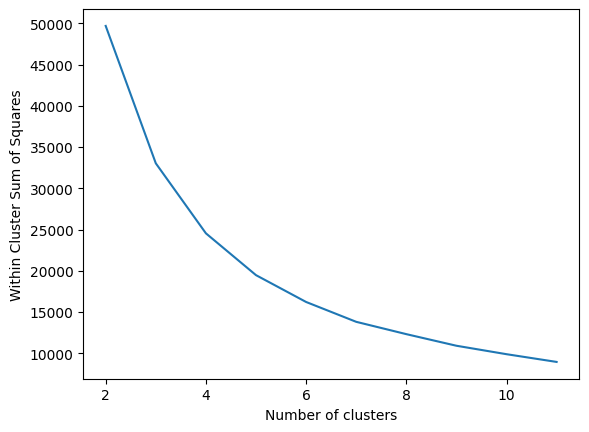

In [ ]:
wcss = []

for i in range(2, 12):
    model = KMeans(n_clusters=i, n_init= 200, random_state= 42)
    model.fit(X_pca2)
    wcss.append(model.inertia_)

plt.plot(range(2, 12), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

In [ ]:
model = KMeans(n_clusters=3, n_init= 'auto')

clusters = model.fit_predict(X_pca2)

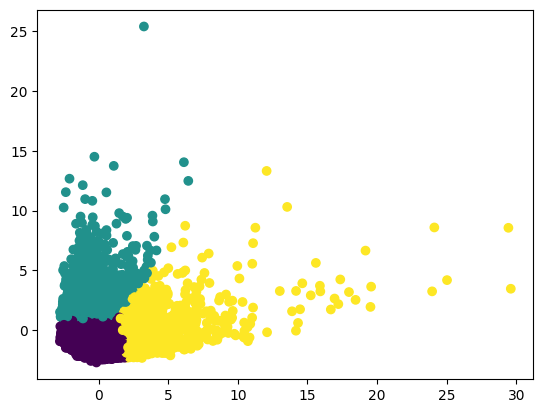

In [ ]:
plt.scatter(X_pca2[:,0], X_pca2[:,1], c= clusters)

In [ ]:
df['clusters'] = clusters

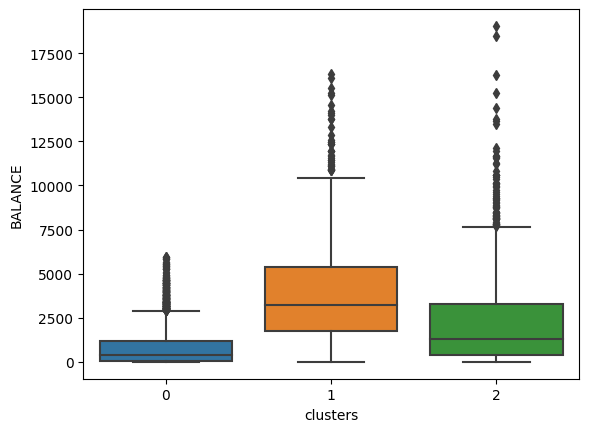

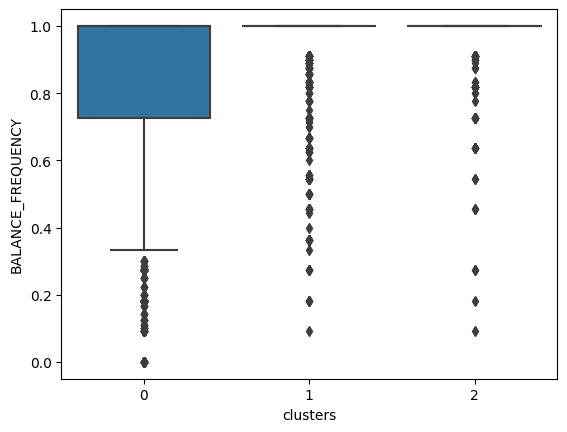

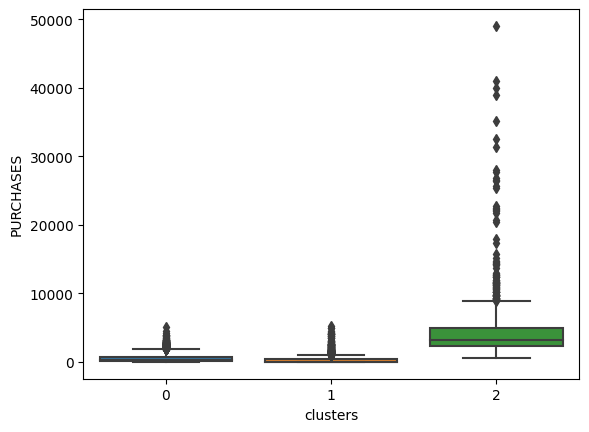

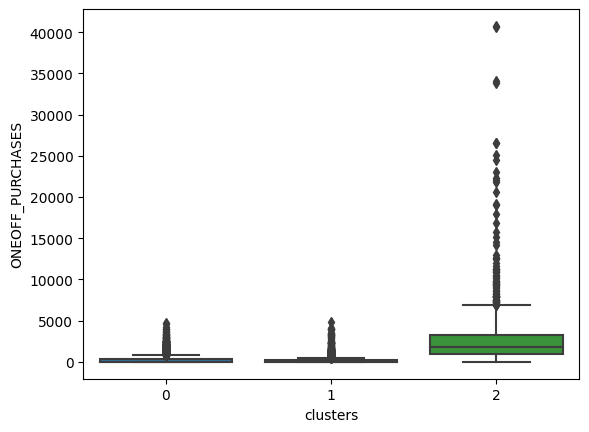

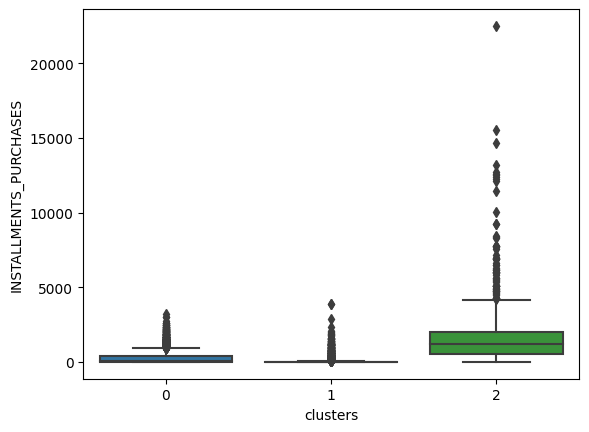

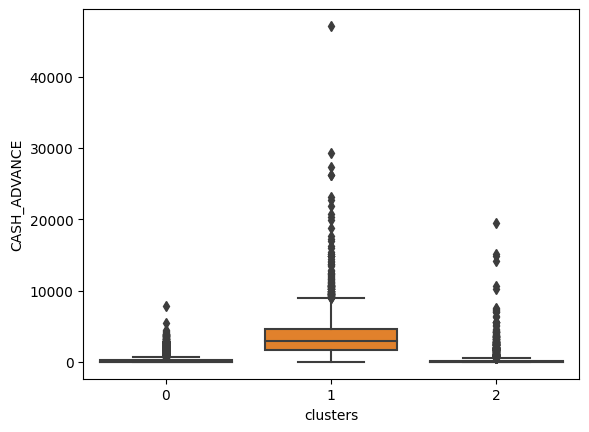

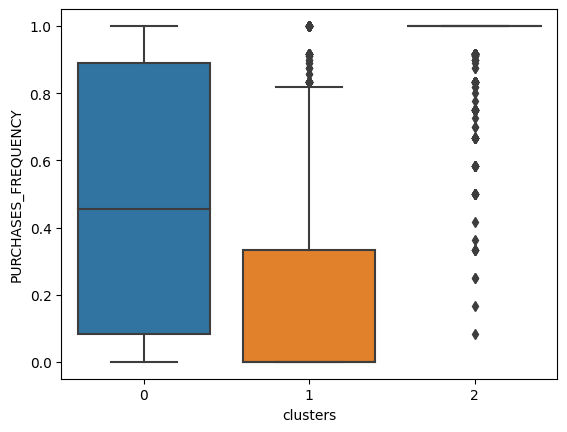

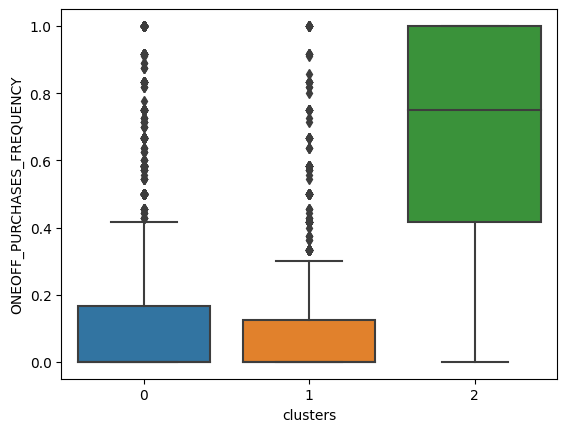

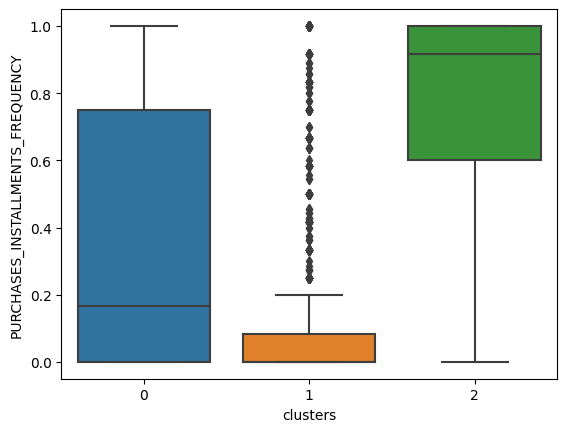

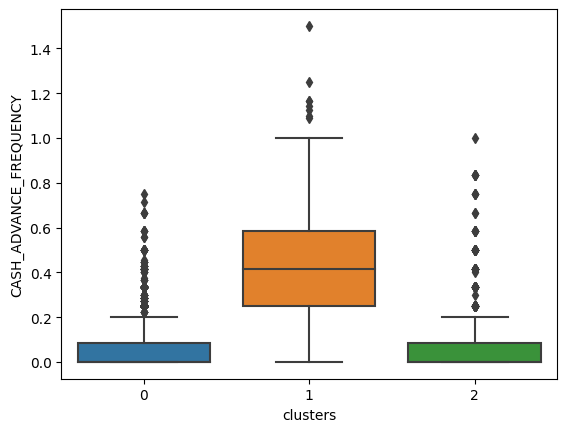

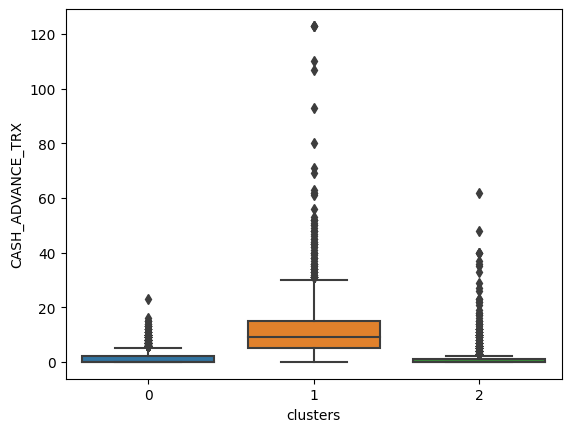

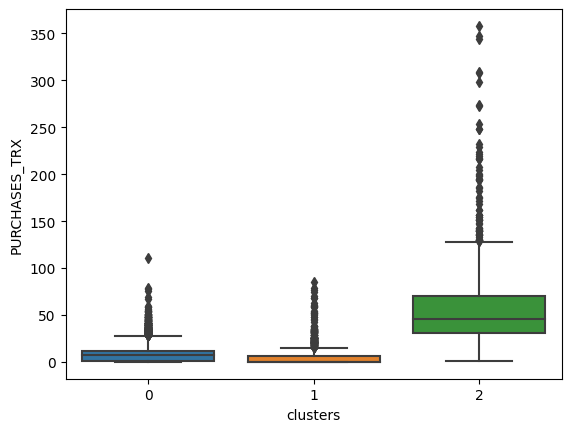

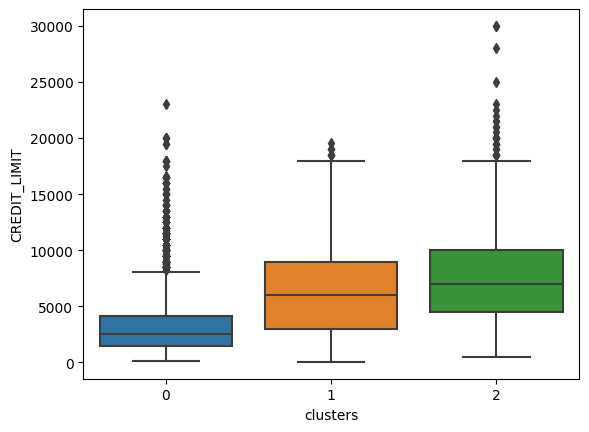

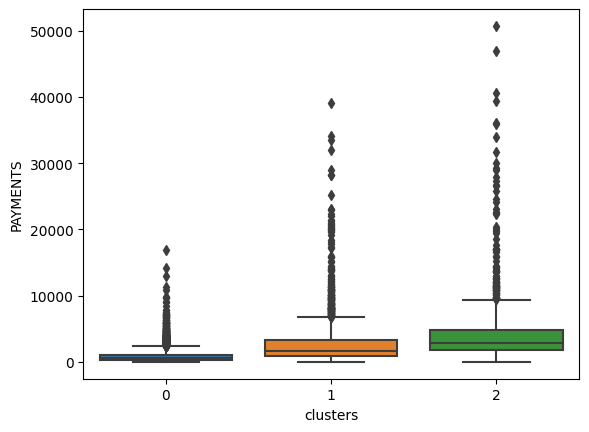

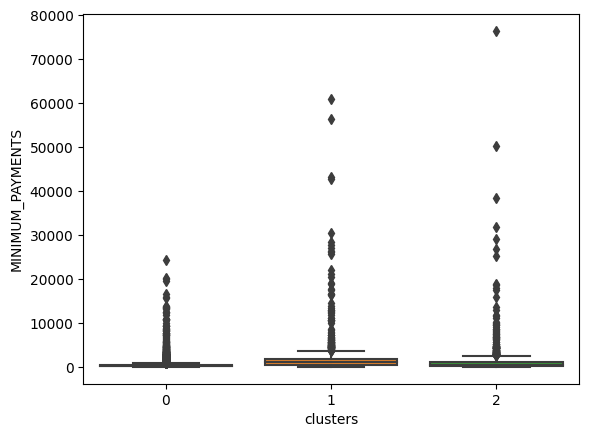

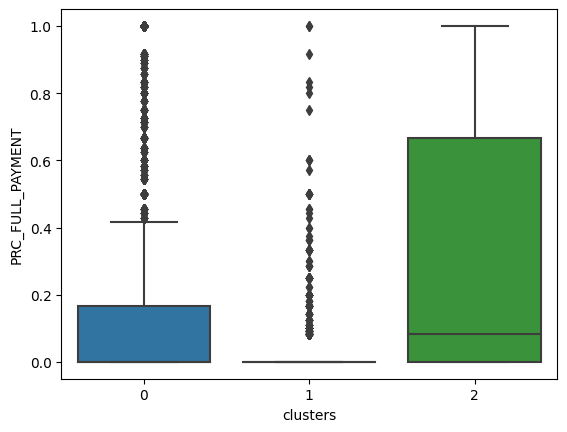

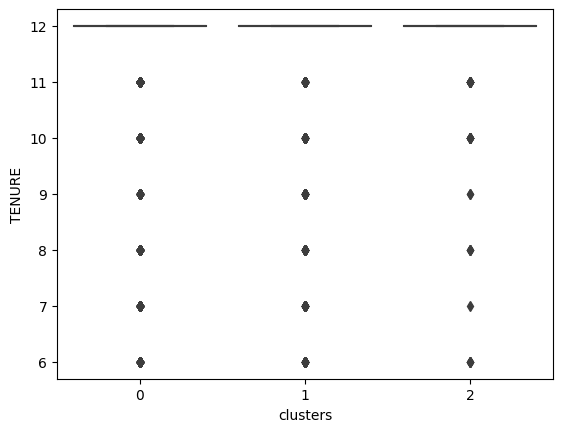

In [ ]:
for col in df.drop('clusters', axis = 1).columns:
    sns.boxplot(data = df, x = 'clusters', y = col)
    plt.show()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1


array([0.27297671, 0.47611451, 0.56424633, 0.63904157, 0.70128886,
       0.75868943, 0.80752368, 0.85051572, 0.8884983 , 0.91929833,
       0.94302084, 0.96075453, 0.9750331 , 0.9872023 , 0.99732897,
       0.99999931, 1.        ])

In [ ]:
pca3 = PCA(n_components= 8)

X_pca3 = pca3.fit_transform(df_scaled)

k_means_pca3 = KMeans(n_clusters=3)

pca3_clusters = k_means_pca3.fit_predict(X_pca3)

D:\conda\envs\simpli\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['pca3_clusters'] =pca3_clusters

In [ ]:
sum(np.where(df['clusters'] != df['pca3_clusters'], 1, 0))

316

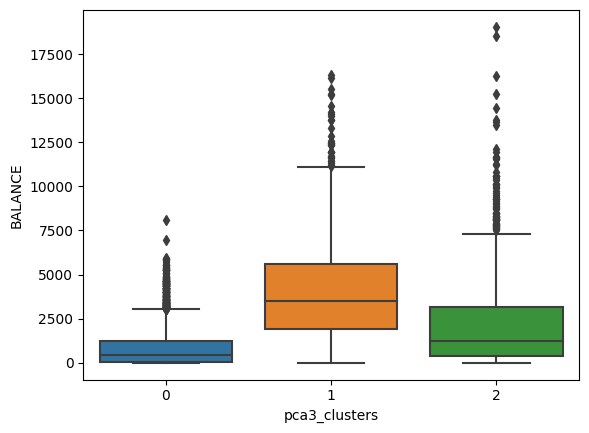

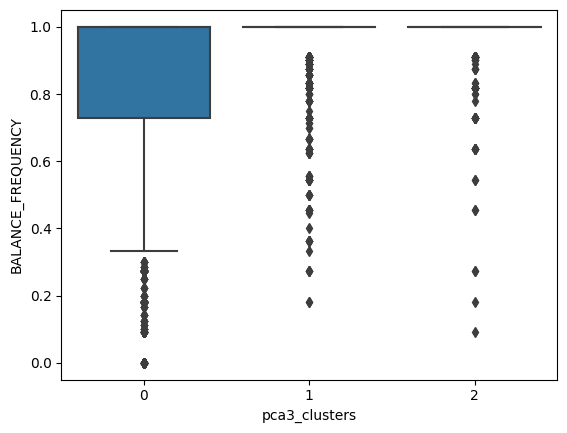

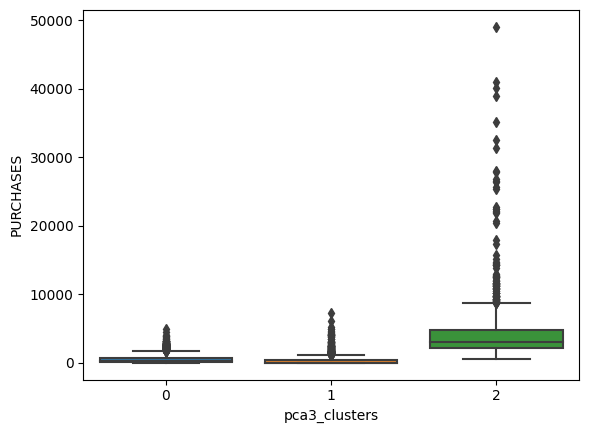

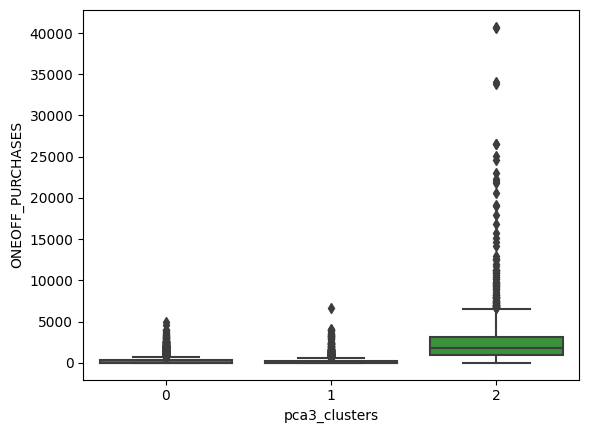

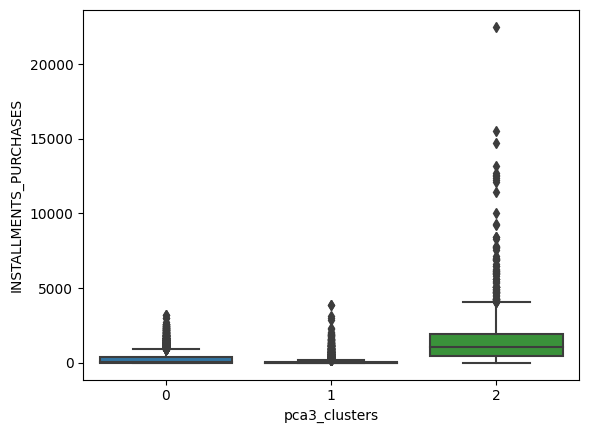

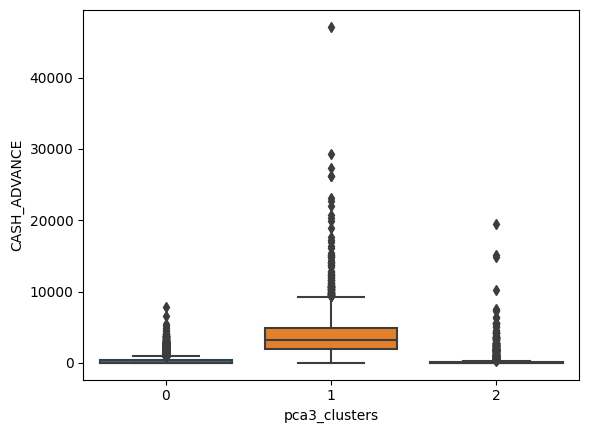

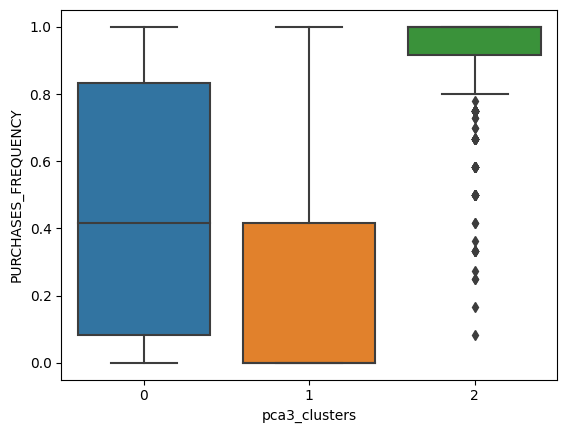

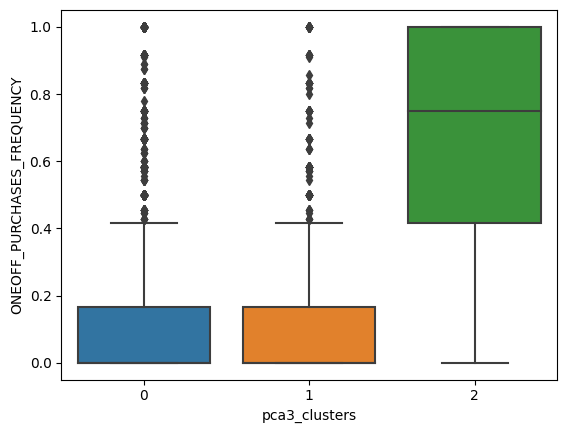

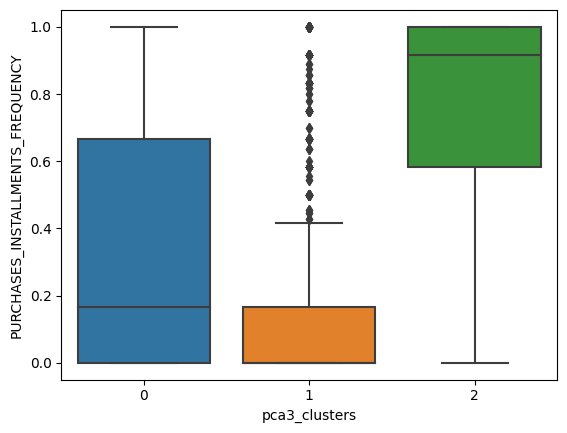

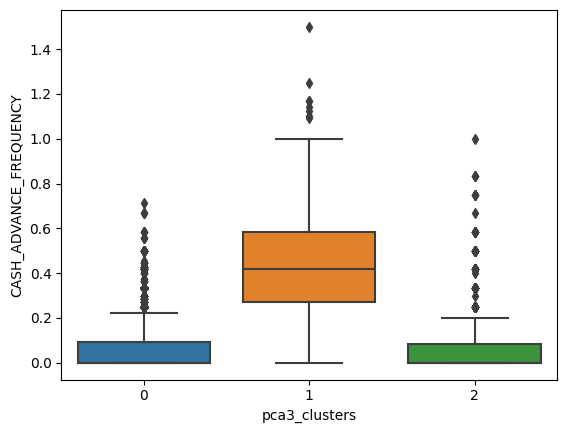

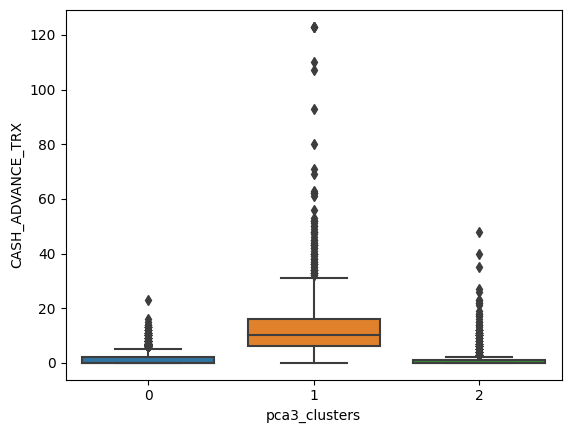

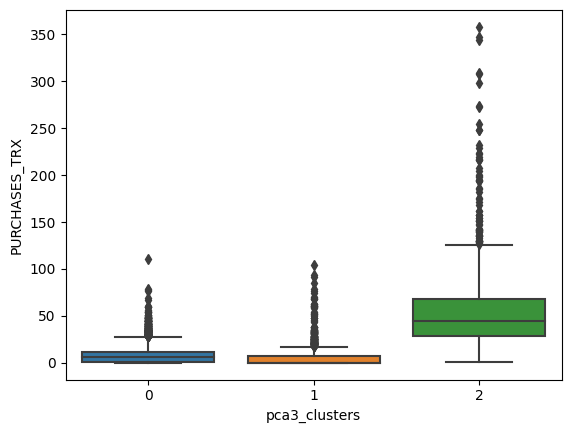

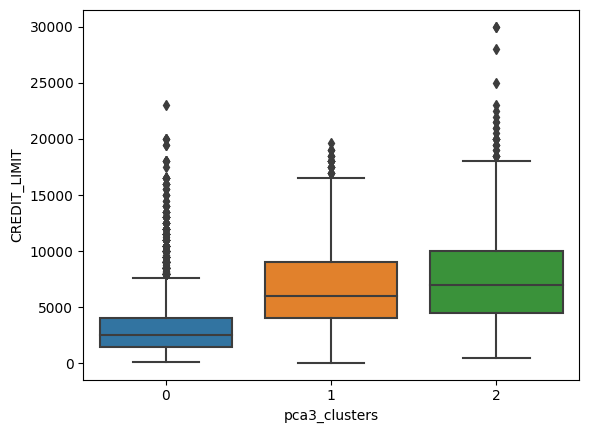

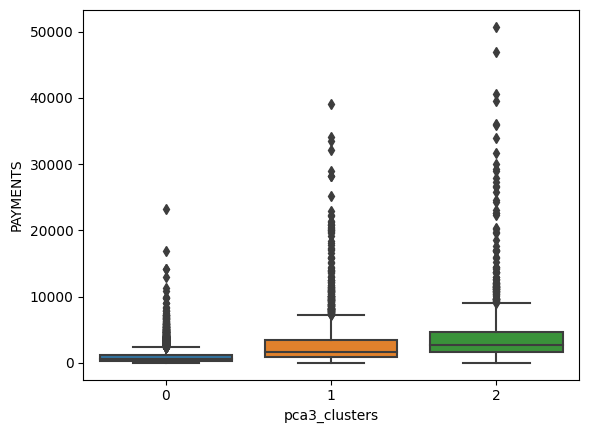

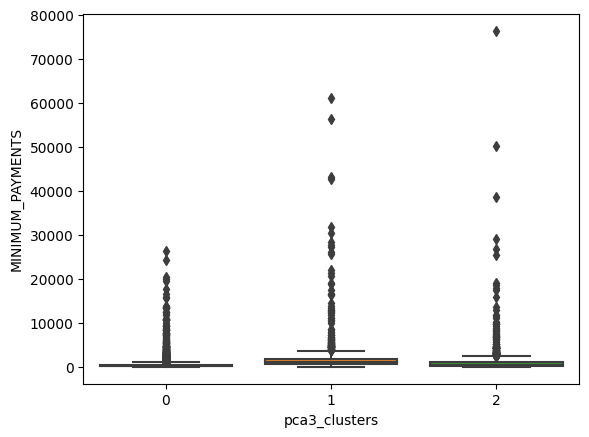

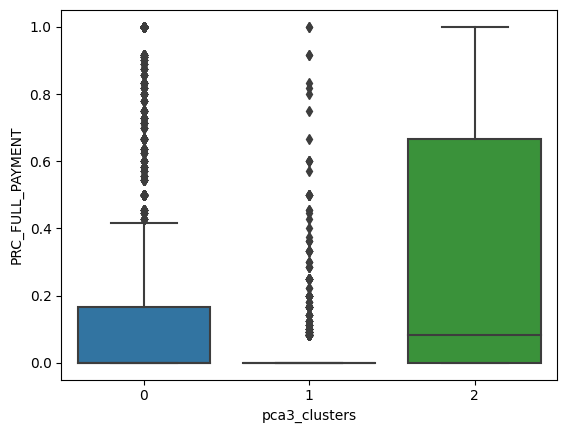

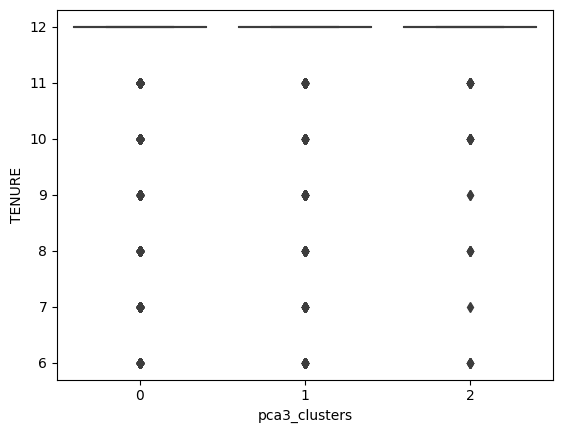

In [ ]:
for col in df.drop(['clusters', 'pca3_clusters'], axis =1 ).columns:
    sns.boxplot(data = df, x = 'pca3_clusters', y = col )
    plt.show()

In [ ]:
birch = Birch(n_clusters= 3)

birch_clusters = birch.fit_predict(X_pca2)

In [ ]:
df['birch_clusters'] = birch_clusters

Text(0, 0.5, 'PC2')

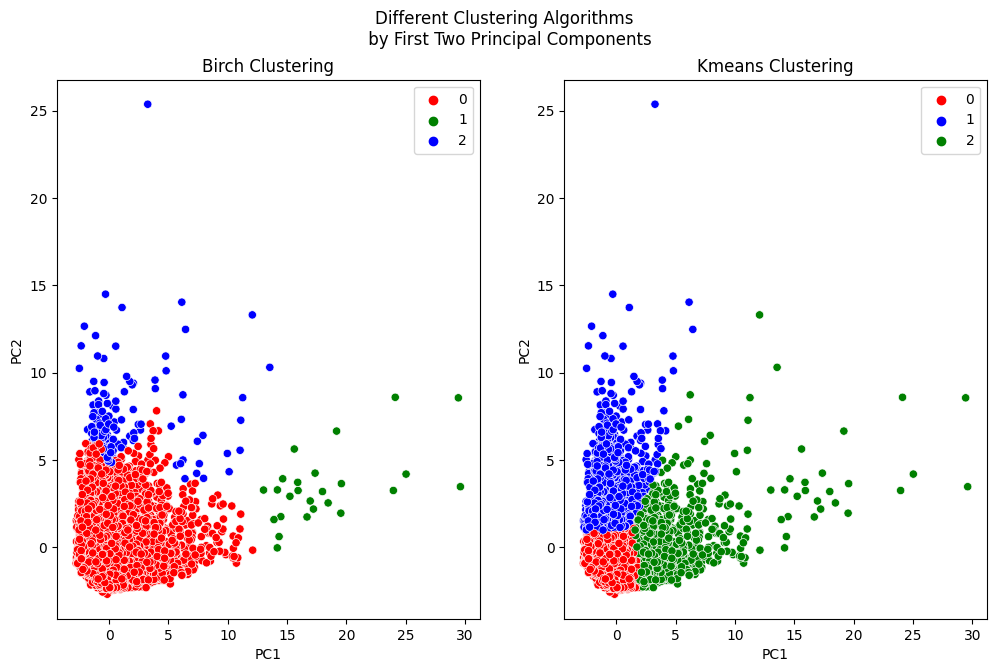

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2)

fig.suptitle("Different Clustering Algorithms \n by First Two Principal Components")

fig.set_figheight(7)
fig.set_figwidth(12)

palette = ["red",'green','blue']
palette2 = ['red','blue','green']

sns.scatterplot(x = X_pca2[:,0], y = X_pca[:,1], hue = birch_clusters,palette=sns.color_palette(palette, 3) , ax = ax1)
ax1.set_title('Birch Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

sns.scatterplot(x = X_pca2[:,0], y = X_pca[:,1], hue = clusters, palette=sns.color_palette(palette2, 3), ax = ax2)
ax2.set_title('Kmeans Clustering')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

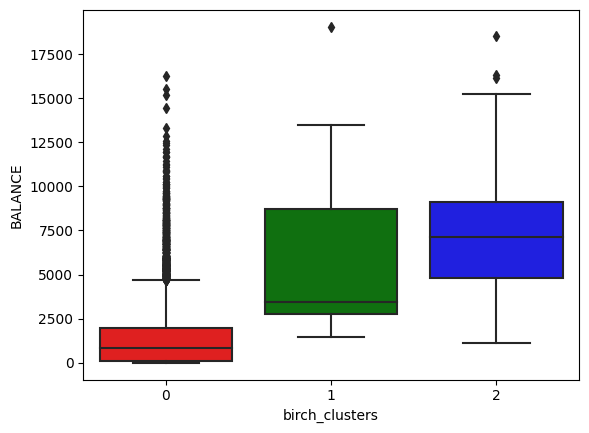

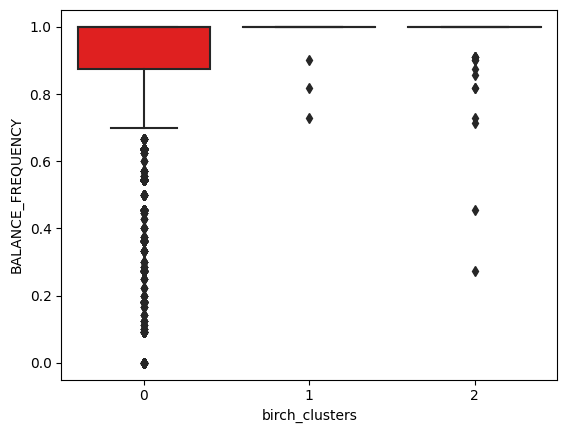

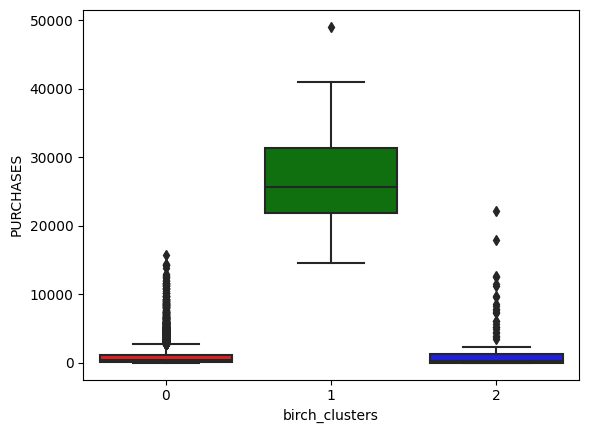

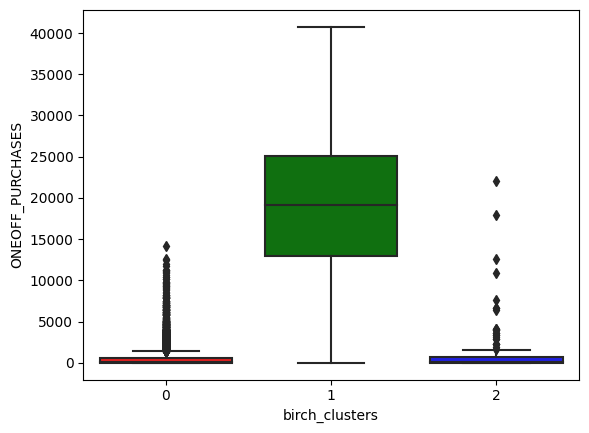

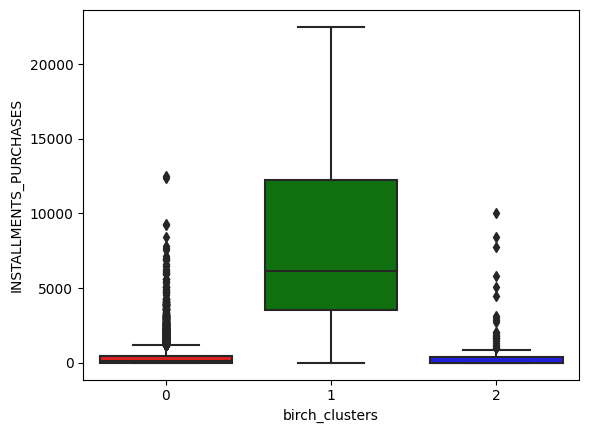

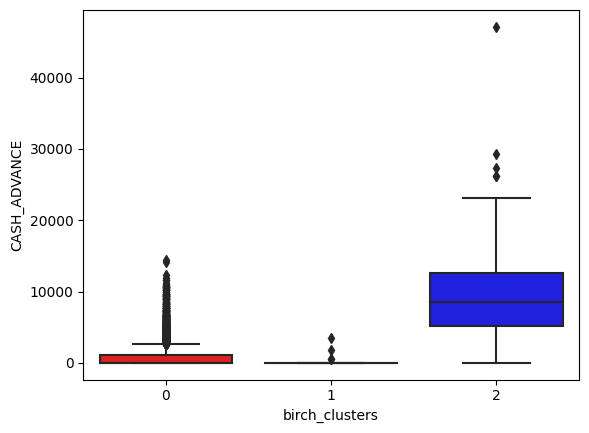

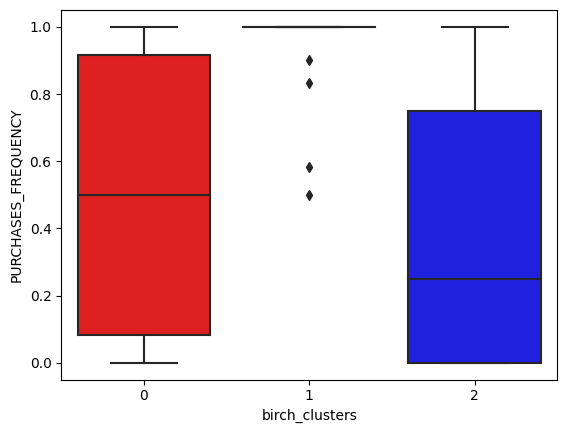

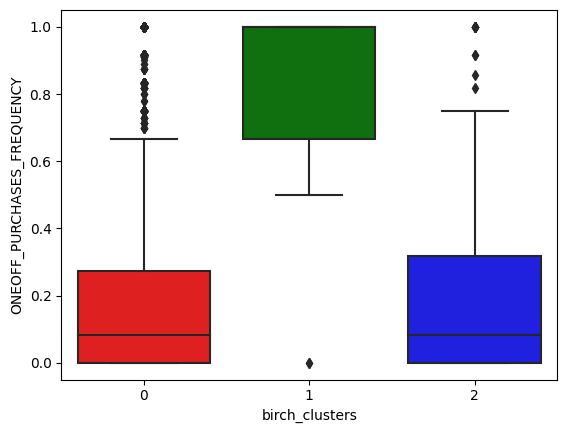

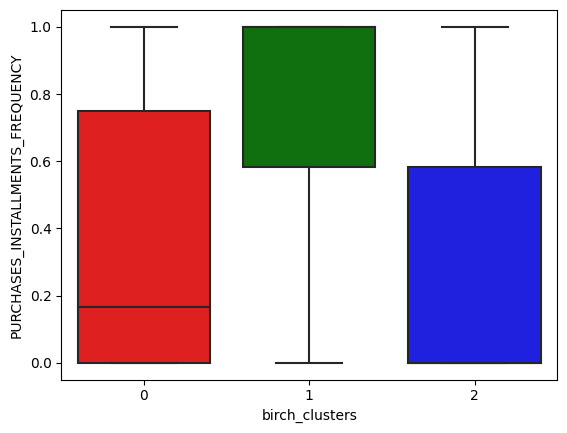

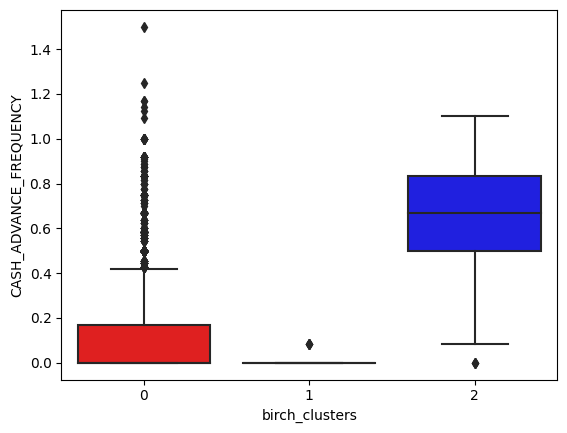

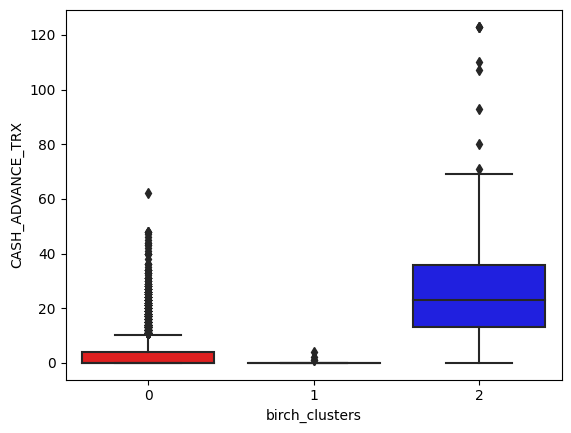

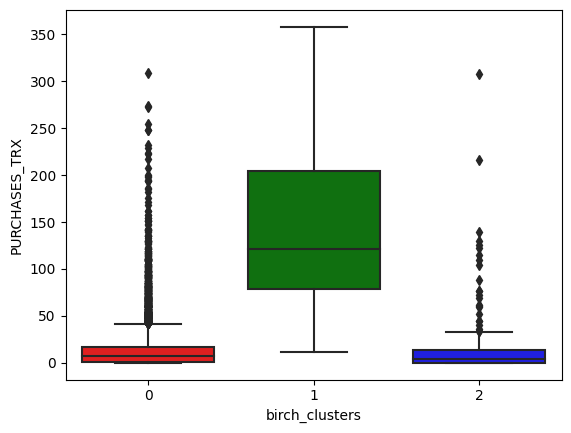

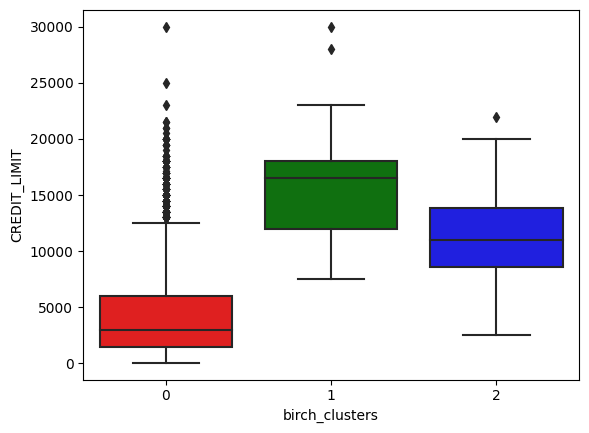

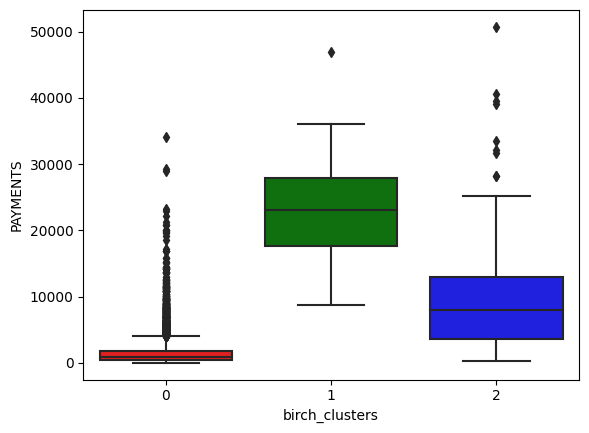

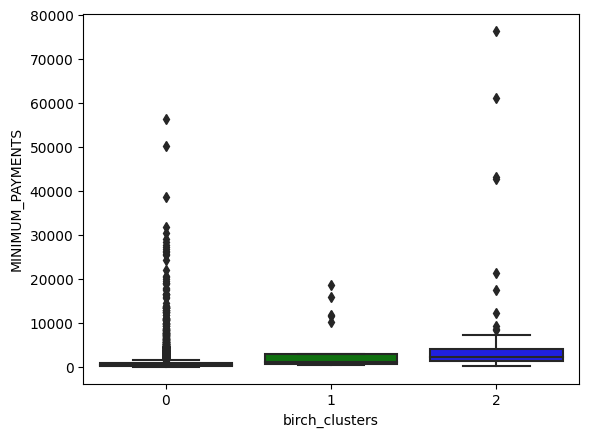

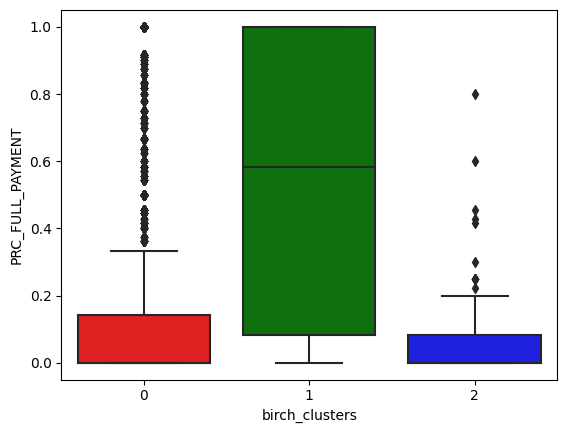

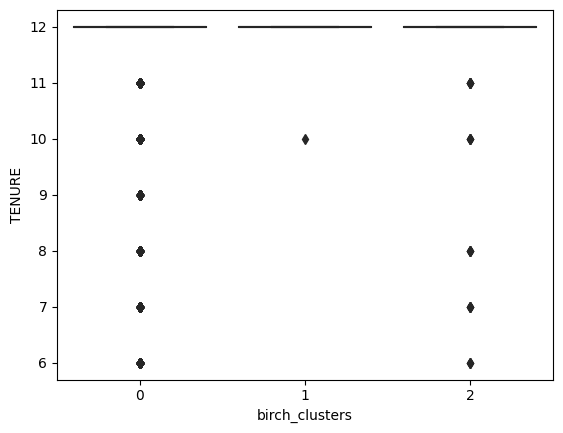

In [ ]:
for col in df.drop(['clusters', 'pca3_clusters', 'birch_clusters'], axis =1 ).columns:
    sns.boxplot(data = df, x = 'birch_clusters', y = col, palette=sns.color_palette(palette, 3))
    plt.show()